Jimena Lezcano Pintos

# Trabajo Práctico de Big Data


> El presente trabajo se centra en la aplicación de técnicas de web scraping en el sitio web de IMBd,, la cual es una pagina donde se realizan reviews de peliculas. Con el fin de  extraer los comentarios y calificaciones de las películas "Boogeyman" y "Flash" para llevar a cabo un procesamiento de texto y análisis de sentimiento utilizando tecnicas de analisis de texto.





Las páginas y los respectivos urls utilizados para el trabajo:


*   Boogeyman: https://www.imdb.com/title/tt5090568/reviews/?ref_=tt_ov_rt
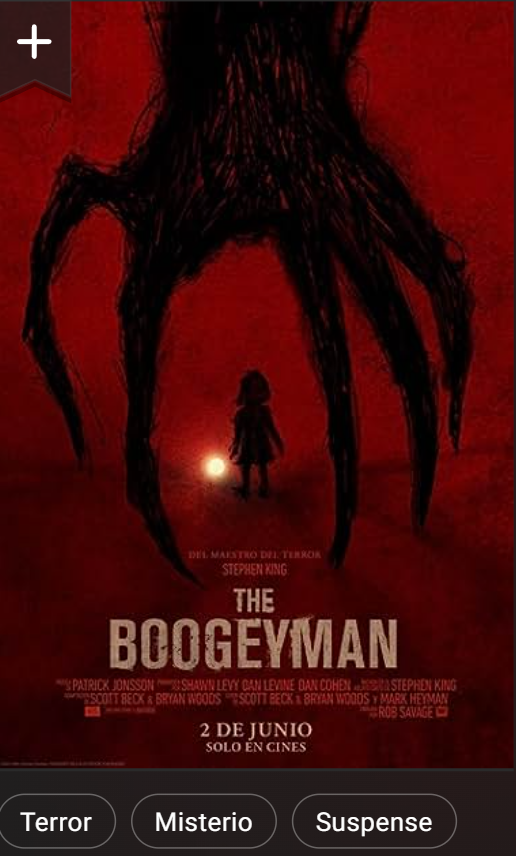
*   Flash: https://www.imdb.com/what-to-watch/fan-favorites/?ref_=hm_fanfav_sm
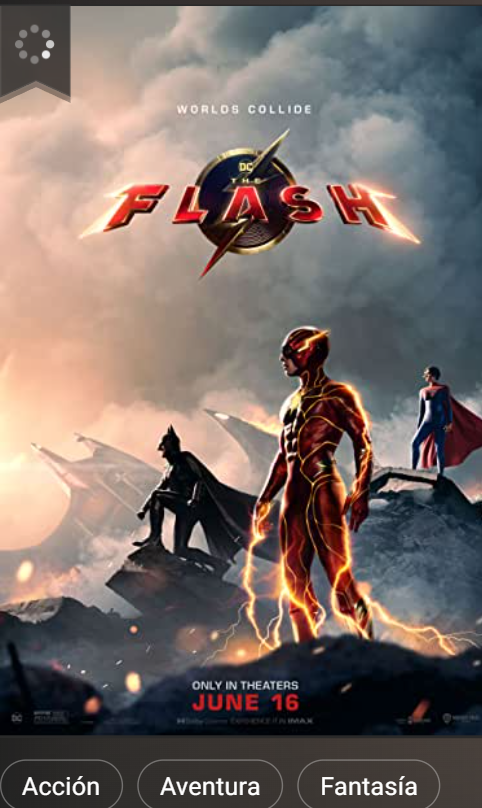










> La elección de estas películas se basa en la idea de comparar y analizar los reviews de las películas de diferentes géneros y públicos.

"Boogeyman" se encuadra en el género de terror, suspenso y miedo. Este género cinematográfico está orientado a generar emociones de tensión, susto y angustia en el espectador. Al seleccionar una película de terror, se espera poder examinar las reacciones y opiniones del público frente a este tipo de género y explorar cómo las diferentes escenas, personajes y elementos del terror impactan en la percepción y experiencia del espectador.

Por otro lado, "Flash" pertenece al género de fantasía y acción. Este género se caracteriza por presentar mundos imaginarios, elementos mágicos y escenas de acción emocionantes. Al elegir una película de fantasía y acción, se busca analizar las emociones y opiniones que este tipo de películas generan en el público, así como la forma en que las secuencias de acción y los elementos fantásticos influyen en la recepción de la película.

Comparar y analizar películas de diferentes géneros como "Boogeyman" (terror, suspenso, miedo) y "Flash" (fantasía, acción) resulta interesante porque permite explorar cómo las emociones y respuestas varían entre distintos tipos de películas y géneros cinematográficos. Además, el público objetivo de estas películas también puede diferir, ya que el género de terror atrae a personas que disfrutan de las emociones intensas y escalofriantes, mientras que las películas de fantasía y acción suelen atraer a aquellos que buscan una experiencia emocionante y llena de aventuras.



## Web Scrapping

El primer paso fue realizar web scrapping de las páginas de reviews de ambas peliculas, para luego analizar los datos más relevantes como comentarios y los rankings de cada pelicula. A continuación ejemplos de lo que fue el web scrapping:

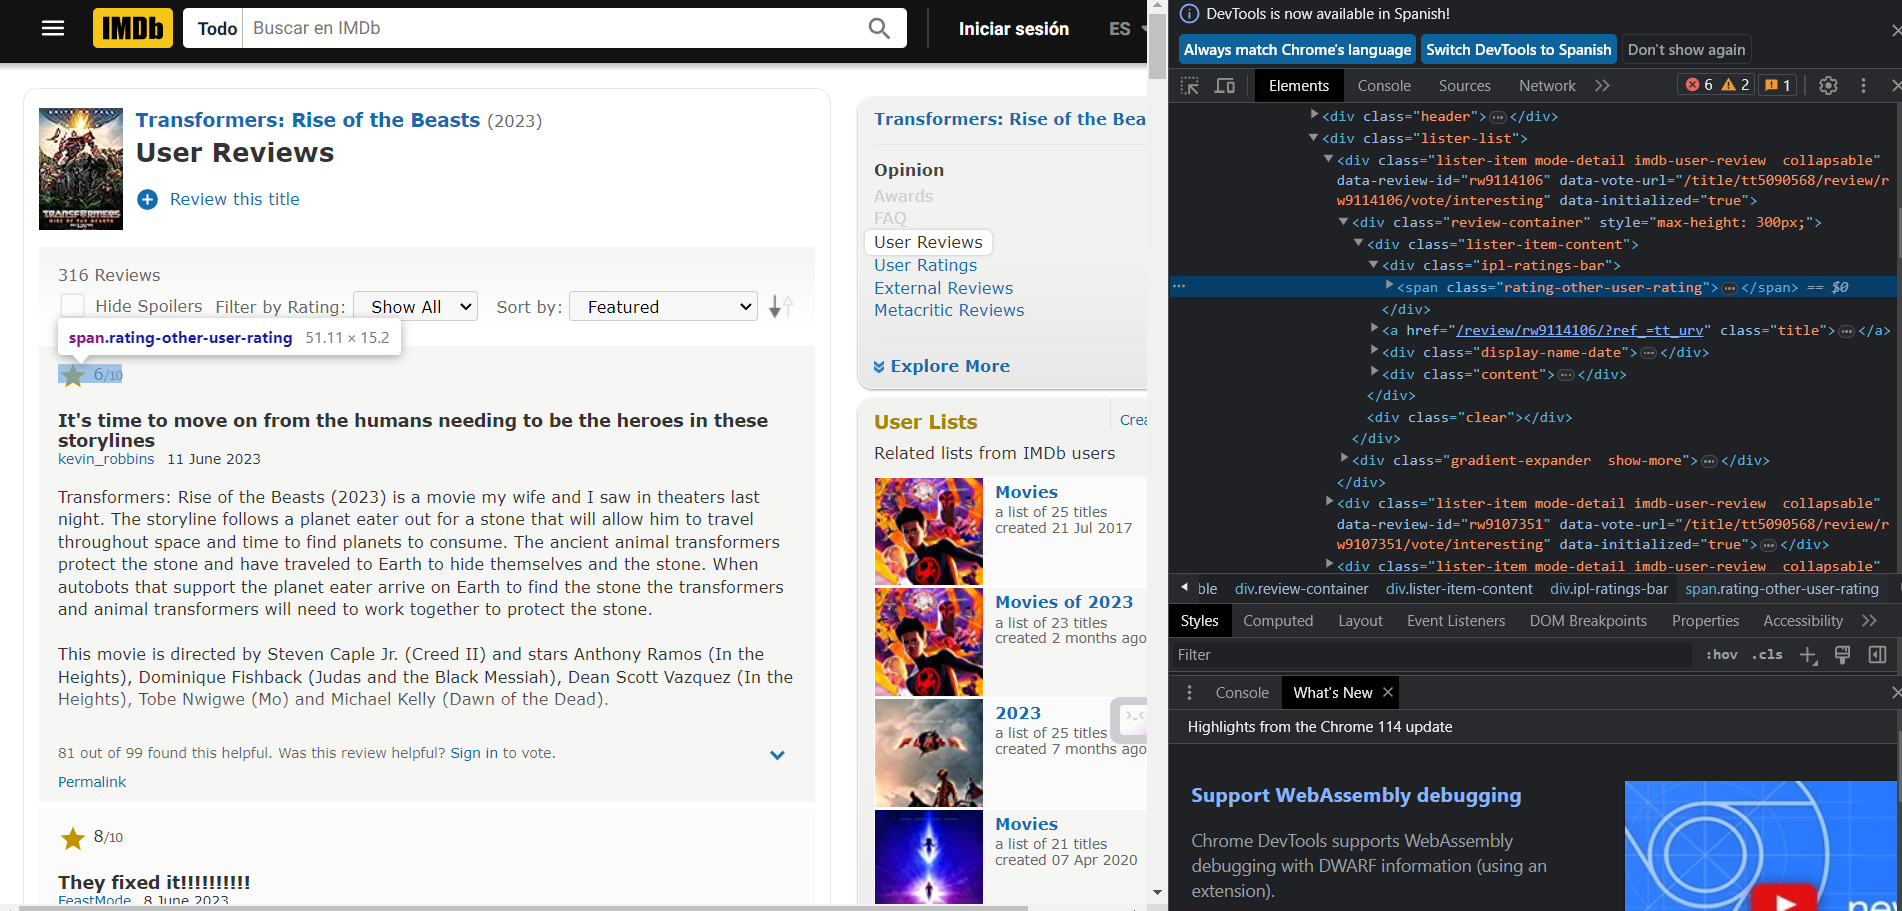

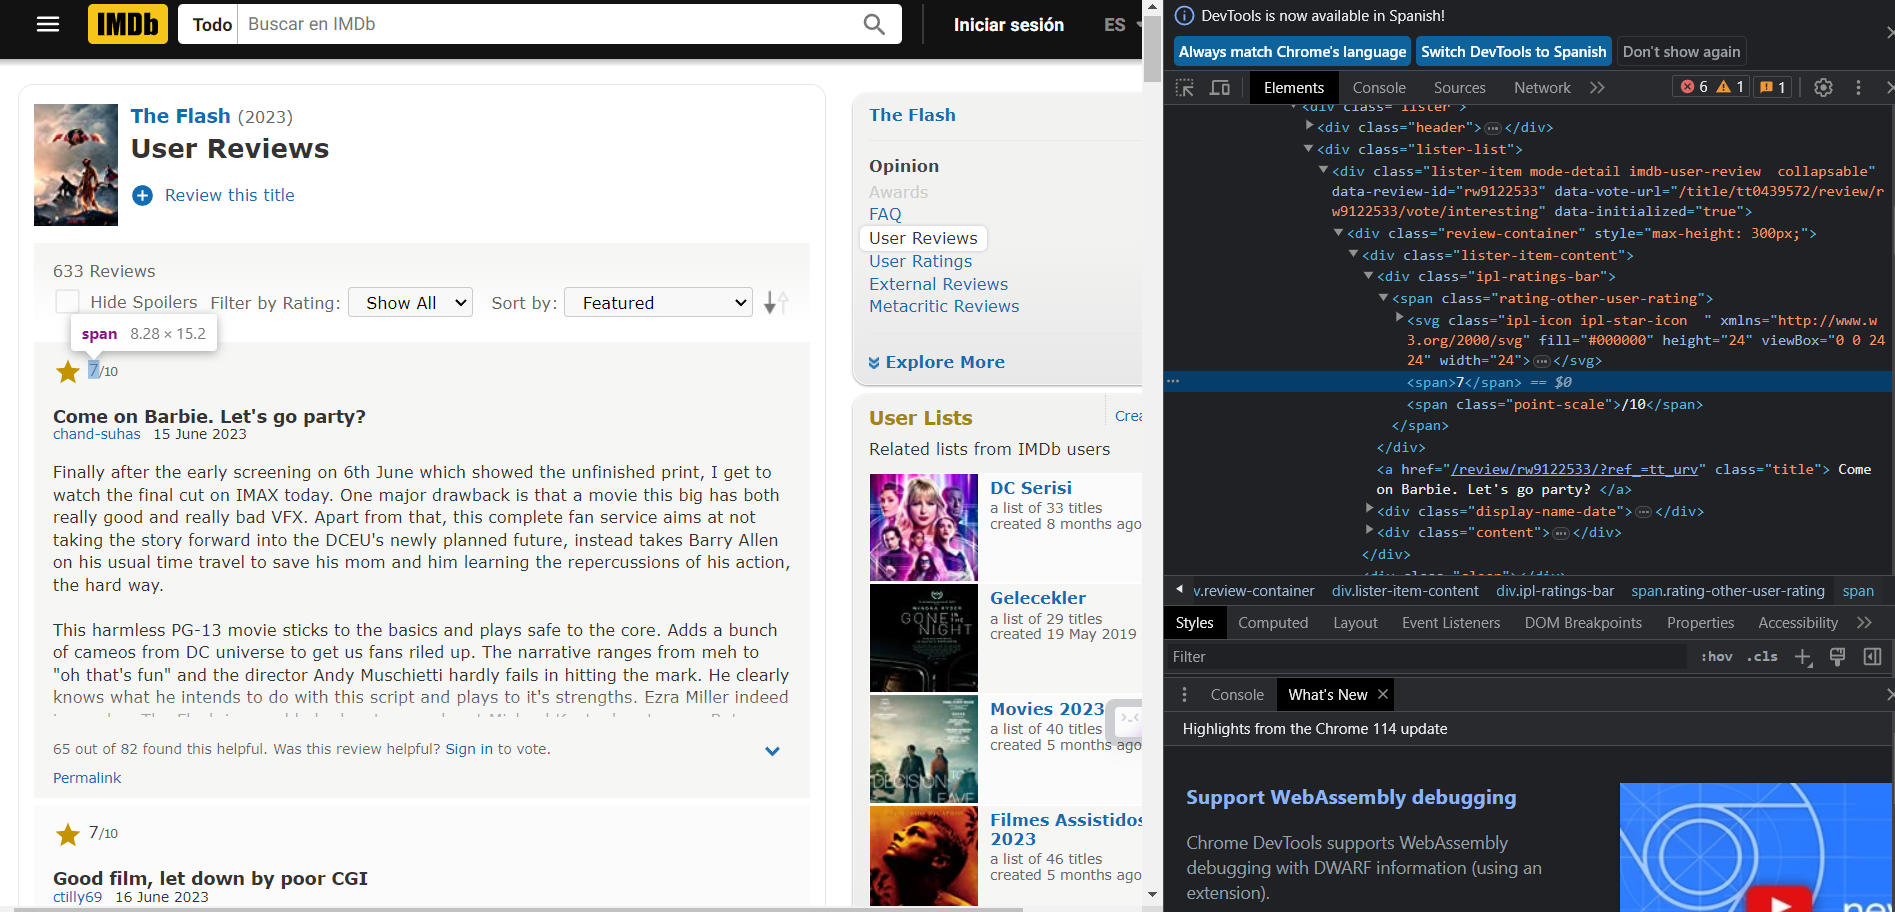

Luego se exportaron todas las librerias y modulos necesarios para extraer y analizar los comentarios como tambien los rankings de las películas.

In [115]:
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

Se definió el diccionario a utilizar para realizar la solicitud de HTTP, estos ayudan a proporcionar información adicional al servidor web y evitan bloqueos o restricciones al realizar las solicitudes al sitio web.

In [116]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

In [117]:
headers

{'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0',
 'Accept-Encoding': 'gzip, deflate',
 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
 'DNT': '1',
 'Connection': 'close',
 'Upgrade-Insecure-Requests': '1'}

Una vez analizadas las páginas se extrayeron los datos de los comentarios, los rankings y las fechas de las reseñas de las películas.

*  Los datos se almacenaron en un DataFrame utilizando pandas. Se crearon DataFrames separados para cada película y se eliminó la columna de URL.


*   Los DataFrames se combinaron en uno solo utilizando la función concat de pandas, y se guardó el DataFrame en un archivo CSV para su posterior análisis.
*   El DataFrame "pelis" contiene todos los comentarios y calificaciones de ambas películas en un formato estructurado.










In [118]:
#URL de las páginas
urls = [
    "https://www.imdb.com/title/tt3427252/reviews/?ref_=tt_ov_rt",
    "https://www.imdb.com/title/tt0439572/reviews/?ref_=tt_ov_rt"
]

max_pages = 10

#Lista para almacenar los datos extraídos
datos_extraidos = []
for url in urls:
  for page in range(1, max_pages+1):
      # Construye la URL de la página actual
      page_url = url + "?page=" + str(page)

      # Envía una solicitud GET a la página
      response = requests.get(page_url)

      # Parsea el contenido HTML de la página
      soup = BeautifulSoup(response.content, "html.parser")

      # Encuentra los contenedores de las reseñas
      containers = soup.find_all("div", class_="lister-item-content")

      # Extrae los datos de cada reseña
      for container in containers:
          comentario = container.find("div", class_="text show-more__control").text.strip()
          ranking = container.find("span", class_="rating-other-user-rating").text.strip()
          fecha = container.find("span", class_="review-date").text.strip()


          # Agrega los datos a la lista
          datos = {
              "Comentario": comentario,
              "Ranking": ranking,
              "Fecha": fecha,
              "pelicula": url
          }
          datos_extraidos.append(datos)


    #Dataframe con todos los datos extraídos
df = pd.DataFrame(datos_extraidos)

#Comentarios con sus respectivas peliculas
df_boogeyman = df[df["pelicula"] == urls[0]].copy()
df_flash = df[df["pelicula"] == urls[1]].copy()

#Eliminar la columna Pelicula
df_boogeyman.drop("pelicula", axis=1, inplace=True)
df_flash.drop("pelicula", axis=1, inplace=True)

#crear una columna con el nombre de la pelicula
df_boogeyman['pelicula'] = 'Boogeyman'
df_flash['pelicula'] = 'Flash'

#Unir los dataframes
pelis = pd.concat([df_boogeyman.reset_index(drop = True), df_flash],
                           axis = 0)

#Guardar el dataframe en archivo CSV
pelis.to_csv("pelis_reviews.csv", index=False)

pelis


,Comentario,Ranking,Fecha,pelicula
0,"Truly, this movie was screwed over with its ti...",8/10,2 June 2023,Boogeyman
1,This could have been a great horror film. The ...,6/10,2 June 2023,Boogeyman
2,Remember Boogeyman from 2005 (and its sequels)...,3/10,2 June 2023,Boogeyman
3,The Boogeyman is a horror movie inspired by a ...,5/10,4 June 2023,Boogeyman
4,I felt this was a mediocre movie. Some of the ...,5/10,10 June 2023,Boogeyman
...,...,...,...,...
495,While this movie is entertaining it doesn't in...,5/10,16 June 2023,Flash
496,WARNING MEGA SPOILERS!!!!I saw The Flash today...,5/10,15 June 2023,Flash
497,** To start this review is from a 60+ yr old.*...,4/10,17 June 2023,Flash
498,I gotta be honest and say that I thought this ...,9/10,14 June 2023,Flash


Limpieza de los datos de los comentarios, eliminando caracteres especiales, signos de puntuación y palabras irrelevantes.



In [119]:
nltk.download('punkt')
nltk.download('stopwords')

def limpiar_comentario(comentario):
    # Eliminar caracteres especiales y signos de puntuación
    comentario = re.sub(r"[^a-zA-Z0-9]", " ", comentario)
    comentario = comentario.lower()

    return comentario

pelis['comentarios_limpios'] = pelis['Comentario'].apply(limpiar_comentario)
pelis.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Comentario,Ranking,Fecha,pelicula,comentarios_limpios
0,"Truly, this movie was screwed over with its ti...",8/10,2 June 2023,Boogeyman,truly this movie was screwed over with its ti...
1,This could have been a great horror film. The ...,6/10,2 June 2023,Boogeyman,this could have been a great horror film the ...
2,Remember Boogeyman from 2005 (and its sequels)...,3/10,2 June 2023,Boogeyman,remember boogeyman from 2005 and its sequels ...
3,The Boogeyman is a horror movie inspired by a ...,5/10,4 June 2023,Boogeyman,the boogeyman is a horror movie inspired by a ...
4,I felt this was a mediocre movie. Some of the ...,5/10,10 June 2023,Boogeyman,i felt this was a mediocre movie some of the ...


Acontinuación se realizó la tokenización y lematización de los comentarios.


● Tokenización:

In [120]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

pelis['comentarios tok'] = pelis['comentarios_limpios'].apply(token_stop_pos)
pelis.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Comentario,Ranking,Fecha,pelicula,comentarios_limpios,comentarios tok
0,"Truly, this movie was screwed over with its ti...",8/10,2 June 2023,Boogeyman,truly this movie was screwed over with its ti...,"[(truly, r), (movie, n), (screwed, v), (title,..."
1,This could have been a great horror film. The ...,6/10,2 June 2023,Boogeyman,this could have been a great horror film the ...,"[(could, None), (great, a), (horror, n), (film..."
2,Remember Boogeyman from 2005 (and its sequels)...,3/10,2 June 2023,Boogeyman,remember boogeyman from 2005 and its sequels ...,"[(remember, v), (boogeyman, n), (2005, None), ..."
3,The Boogeyman is a horror movie inspired by a ...,5/10,4 June 2023,Boogeyman,the boogeyman is a horror movie inspired by a ...,"[(boogeyman, n), (horror, n), (movie, n), (ins..."
4,I felt this was a mediocre movie. Some of the ...,5/10,10 June 2023,Boogeyman,i felt this was a mediocre movie some of the ...,"[(felt, v), (mediocre, a), (movie, n), (jump, ..."


● Lematización:

In [121]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

pelis['Lemma'] = pelis['comentarios tok'].apply(lemmatize)
pelis.head()

,Comentario,Ranking,Fecha,pelicula,comentarios_limpios,comentarios tok,Lemma
0,"Truly, this movie was screwed over with its ti...",8/10,2 June 2023,Boogeyman,truly this movie was screwed over with its ti...,"[(truly, r), (movie, n), (screwed, v), (title,...",truly movie screw title know adaptation boog...
1,This could have been a great horror film. The ...,6/10,2 June 2023,Boogeyman,this could have been a great horror film the ...,"[(could, None), (great, a), (horror, n), (film...",could great horror film dread set lighting p...
2,Remember Boogeyman from 2005 (and its sequels)...,3/10,2 June 2023,Boogeyman,remember boogeyman from 2005 and its sequels ...,"[(remember, v), (boogeyman, n), (2005, None), ...",remember boogeyman 2005 sequel film base ste...
3,The Boogeyman is a horror movie inspired by a ...,5/10,4 June 2023,Boogeyman,the boogeyman is a horror movie inspired by a ...,"[(boogeyman, n), (horror, n), (movie, n), (ins...",boogeyman horror movie inspire stephen king ...
4,I felt this was a mediocre movie. Some of the ...,5/10,10 June 2023,Boogeyman,i felt this was a mediocre movie some of the ...,"[(felt, v), (mediocre, a), (movie, n), (jump, ...",felt mediocre movie jump scar first half pre...


## Análisis de Sentimiento

Se llevó a cabo un análisis de sentimiento utilizando dos métodos los cuales son TextBlob y VADER. El objetivo de estos análisis es comparar los resultados obtenidos por cada método.

### Analisis con Textblob

TextBlob es una biblioteca de procesamiento de lenguaje natural que ofrece una función para analizar el sentimiento de un texto. Utilizando esta función, se asignó un puntaje de sentimiento a cada comentario extraído, indicando si era positivo, negativo o neutro.

In [122]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [123]:
fin_data = pd.DataFrame(pelis[['Lemma', 'pelicula', 'Ranking', 'Fecha']])

In [124]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity)
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity)
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data

,Lemma,pelicula,Ranking,Fecha,Polarity,Analysis
0,truly movie screw title know adaptation boog...,Boogeyman,8/10,2 June 2023,0.110325,Positive
1,could great horror film dread set lighting p...,Boogeyman,6/10,2 June 2023,0.194444,Positive
2,remember boogeyman 2005 sequel film base ste...,Boogeyman,3/10,2 June 2023,-0.022500,Negative
3,boogeyman horror movie inspire stephen king ...,Boogeyman,5/10,4 June 2023,-0.104637,Negative
4,felt mediocre movie jump scar first half pre...,Boogeyman,5/10,10 June 2023,0.044365,Positive
...,...,...,...,...,...,...
495,movie entertain introduce new idea basically...,Flash,5/10,16 June 2023,0.077919,Positive
496,warn mega spoiler saw flash today movie thea...,Flash,5/10,15 June 2023,0.060122,Positive
497,start review 60 yr old thanks present batman...,Flash,4/10,17 June 2023,0.120833,Positive
498,get ta honest say think movie dead water bad...,Flash,9/10,14 June 2023,0.105702,Positive


In [125]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    380
Negative    120
Name: Analysis, dtype: int64

Como se puede observar con el análisis de Texblob no se encontró comentarios Neutrales en ninguna de las peliculas. Los resultados fueron solo comentarios positivos y negativos con una gran diferencia.

### Analisis con VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) es otra herramienta popular para el análisis de sentimiento. Se basa en un diccionario léxico que asigna puntajes a palabras en función de su polaridad. Con VADER, también se asignó un puntaje de sentimiento a cada comentario, determinando si era positivo, negativo o neutro.

In [126]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [128]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,Lemma,pelicula,Ranking,Fecha,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,truly movie screw title know adaptation boog...,Boogeyman,8/10,2 June 2023,0.110325,Positive,-0.0388,Neutral
1,could great horror film dread set lighting p...,Boogeyman,6/10,2 June 2023,0.194444,Positive,-0.2118,Neutral
2,remember boogeyman 2005 sequel film base ste...,Boogeyman,3/10,2 June 2023,-0.022500,Negative,-0.9661,Negative
3,boogeyman horror movie inspire stephen king ...,Boogeyman,5/10,4 June 2023,-0.104637,Negative,-0.9932,Negative
4,felt mediocre movie jump scar first half pre...,Boogeyman,5/10,10 June 2023,0.044365,Positive,-0.1828,Neutral


In [129]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    240
Negative    180
Neutral      80
Name: Vader Analysis, dtype: int64

Con el método de VADER se extrajeron comentarios positivos, negativos y neutros. La suma de los comentarios positivos tienen una gran diferencia en comparacion a los comentarios positivos y negativos.

Se puede observar que ambos métodos extrajeron resultados similares. En cambio el único método que percibio comentarios neutros fue VADER, lo que se podría decir que es un mejor resultado, ya que al mirar los comentarios de las peliculas se puede observar que hay variedad de opiniones y emociones.

## Analisis  sobre los rankings de las peliculas

Para poder gráficar y análizar los rankings de las peliculas primero se realizaron algunas limpiezas. Como cambiar el tipo de datos y separando los datos para utilizarlos posteriormente.

In [130]:
print(pelis['Ranking'].unique())

['8/10' '6/10' '3/10' '5/10' '4/10' '7/10' '2/10' '1/10' '9/10']


In [131]:
pelis['Ranking'].str.split('/', expand=True)[0]

0      8
1      6
2      3
3      5
4      5
      ..
495    5
496    5
497    4
498    9
499    5
Name: 0, Length: 500, dtype: object

In [132]:
pelis['Ranking'] = pelis['Ranking'].str.split('/', expand=True)[0]
pelis['Ranking'].head(5)

0    8
1    6
2    3
3    5
4    5
Name: Ranking, dtype: object

In [133]:
# Convertir la columna "Ranking" a valores numéricos
pelis['Ranking'] = pd.to_numeric(pelis['Ranking'], errors='coerce')

# Calcular el promedio de los rankings por película
promedio_rankings = pelis.groupby('pelicula')['Ranking'].mean()

# Calcular el máximo y mínimo de los rankings por película
maximo_ranking = pelis.groupby('pelicula')['Ranking'].max()
minimo_ranking = pelis.groupby('pelicula')['Ranking'].min()

cantidad_comentarios = pelis['pelicula'].value_counts()

# Mostrar los resultados
print("Promedio de Rankings por Película:")
print(promedio_rankings)
print("\nMáximo de Rankings por Película:")
print(maximo_ranking)
print("\nMínimo de Rankings por Película:")
print(minimo_ranking)
print("\nCantidad de Comentarios por Película:")
print(cantidad_comentarios)

Promedio de Rankings por Película:
pelicula
Boogeyman    4.24
Flash        6.40
Name: Ranking, dtype: float64

Máximo de Rankings por Película:
pelicula
Boogeyman    8
Flash        9
Name: Ranking, dtype: int64

Mínimo de Rankings por Película:
pelicula
Boogeyman    1
Flash        2
Name: Ranking, dtype: int64

Cantidad de Comentarios por Película:
Boogeyman    250
Flash        250
Name: pelicula, dtype: int64


Se calculó el promedio, el máximo y mínimo de los rankings de las diferentes películas.

## Visualización de los resultados

Visualización de los resultados mediante gráficos para obtener una representación clara de los datos.

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Gráficos de barras

 Gráficos de barras para mostrar la distribución de los comentarios por categoría de sentimiento (positivo, negativo, neutro) de las diferentes películas y sus metodos de análisis de sentimiento.

Análisis Textblob Sentimientos entre Películas

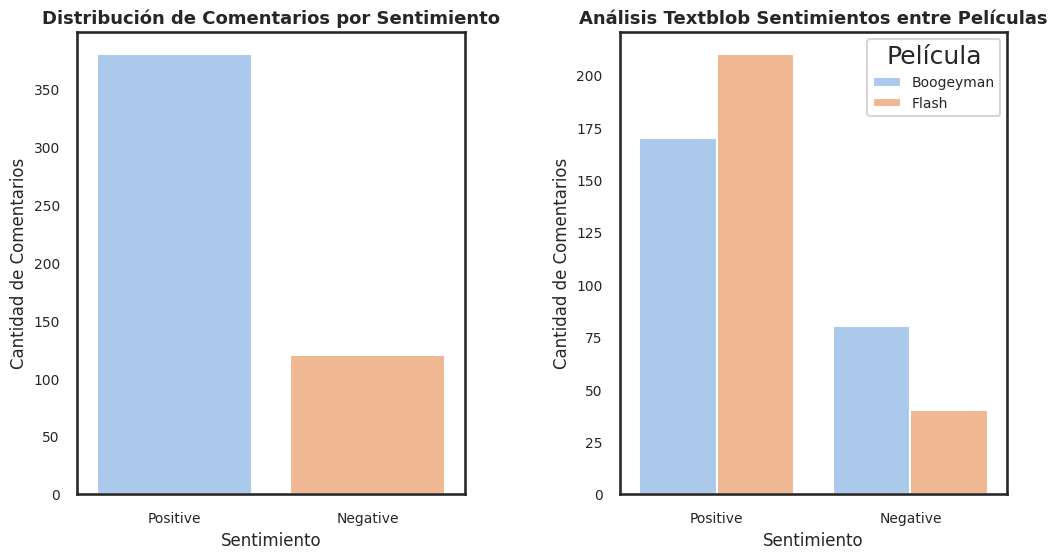

In [135]:
#Estilo
sns.set(style='white')
sns.set_palette('pastel')
sns.set_context('talk')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Grafico  distribución de comentarios por sentimiento
sns.countplot(data=fin_data, x='Analysis', ax=axes[0])
axes[0].set_title('Distribución de Comentarios por Sentimiento', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Sentimiento', fontsize=12)
axes[0].set_ylabel('Cantidad de Comentarios', fontsize=12)
axes[0].tick_params(axis='both', labelsize=10)

# Grafico comparación de sentimientos entre películas
sns.countplot(data=fin_data, x='Analysis', hue='pelicula', ax=axes[1])
axes[1].set_title('Análisis Textblob Sentimientos entre Películas', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Sentimiento', fontsize=12)
axes[1].set_ylabel('Cantidad de Comentarios', fontsize=12)
axes[1].legend(title='Película', fontsize=10)
axes[1].tick_params(axis='both', labelsize=10)

plt.subplots_adjust(wspace=0.4)

plt.show()



> Se puede observar que la película Flash ha tenido mayores comentarios positivos y menos comentarios negativos en comparacion a la peíluca Boogeyman, que se puede notar que cuenta con muchos comentarios negativos.



En los siguientes gráficos se visualizan las comparaciones de los resultados de los diferentes métodos de análisis de acuerdo a las películas.

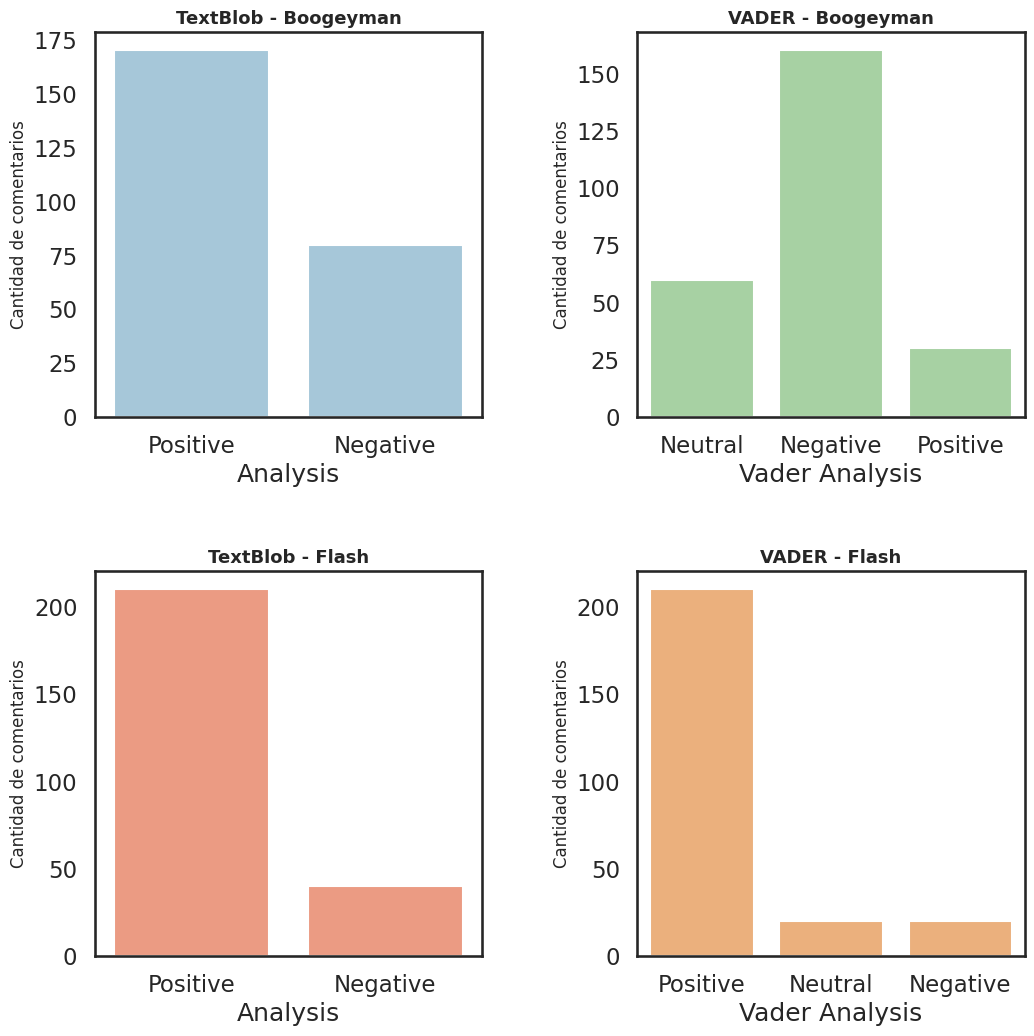

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white')
sns.set_context('talk')
paleta_colores = ['#9ecae1', '#a1d99b', '#fc9272', '#fdae6b']
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Gráfico TextBlob - Boogeyman (color celeste pastel)
tb_counts_boogeyman = fin_data[fin_data['pelicula'] == 'Boogeyman']['Analysis'].value_counts()
axes[0, 0].set_title("TextBlob - Boogeyman", fontsize=13, fontweight='bold')
sns.countplot(data=fin_data[fin_data['pelicula'] == 'Boogeyman'], x='Analysis', ax=axes[0, 0], palette=[paleta_colores[0]])
axes[0, 0].set_ylabel("Cantidad de comentarios", fontsize=12)

# Gráfico VADER - Boogeyman (color verde pastel)
vader_counts_boogeyman = fin_data[fin_data['pelicula'] == 'Boogeyman']['Vader Analysis'].value_counts()
axes[0, 1].set_title("VADER - Boogeyman", fontsize=13, fontweight='bold')
sns.countplot(data=fin_data[fin_data['pelicula'] == 'Boogeyman'], x='Vader Analysis', ax=axes[0, 1], palette=[paleta_colores[1]])
axes[0, 1].set_ylabel("Cantidad de comentarios", fontsize=12)

# Gráfico TextBlob - Flash (color rojo pastel)
tb_counts_flash = fin_data[fin_data['pelicula'] == 'Flash']['Analysis'].value_counts()
axes[1, 0].set_title("TextBlob - Flash", fontsize=13, fontweight='bold')
sns.countplot(data=fin_data[fin_data['pelicula'] == 'Flash'], x='Analysis', ax=axes[1, 0], palette=[paleta_colores[2]])
axes[1, 0].set_ylabel("Cantidad de comentarios", fontsize=12)

# Gráfico VADER - Flash (color naranja pastel)
vader_counts_flash = fin_data[fin_data['pelicula'] == 'Flash']['Vader Analysis'].value_counts()
axes[1, 1].set_title("VADER - Flash", fontsize=13, fontweight='bold')
sns.countplot(data=fin_data[fin_data['pelicula'] == 'Flash'], x='Vader Analysis', ax=axes[1, 1], palette=[paleta_colores[3]])
axes[1, 1].set_ylabel("Cantidad de comentarios", fontsize=12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()







> *   Con relación a la película Boogeyman, al analizar los gráficos se observa una diferencia significativa en la percepción proporcionada por ambos métodos. Con el método Textblob se percibe mayores comentarios positivos que negativos. En cambio al emplear el método Vader se percibe mayor cantidad de comentarios negativos que positivos y neutros. Estos resultados indican diferencias en la interpetación de los sentimientos expresados en los comentarios según los dos métodos utilizados.


> *   En cuanto a la película Flash ambos métodos percibieron la misma cantidad de comentarios positivos, pero el método de VADER percibio comentarios neutros en comparación a TextBlob que no percibio ninguno.









### Gráficos de tortas

 Gráficos de tortas para mostrar la distribución de los comentarios por categoría de sentimiento (positivo, negativo, neutro) en porcentaje de las diferentes películas y sus metodos de análisis de sentimiento.

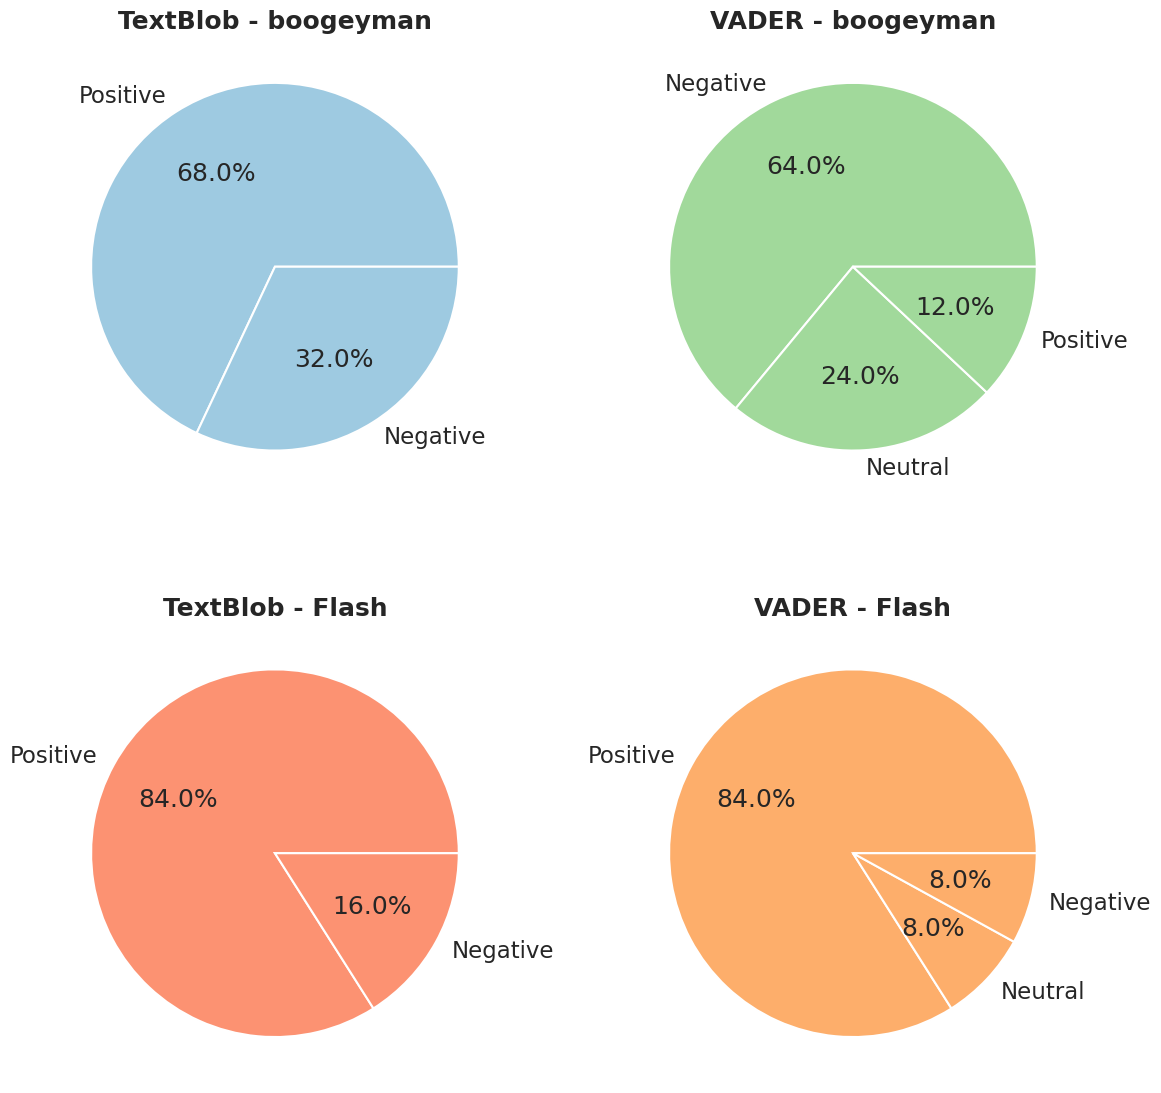

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

tb_counts_boogeyman = fin_data[fin_data['pelicula'] == 'Boogeyman']['Analysis'].value_counts()
vader_counts_boogeyman = fin_data[fin_data['pelicula'] == 'Boogeyman']['Vader Analysis'].value_counts()
tb_counts_flash = fin_data[fin_data['pelicula'] == 'Flash']['Analysis'].value_counts()
vader_counts_flash = fin_data[fin_data['pelicula'] == 'Flash']['Vader Analysis'].value_counts()


colors = ['#9ecae1', '#a1d99b', '#fc9272', '#fdae6b']
sns.set(style='white')
sns.set_context('talk')
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Gráfico TextBlob - Spiderman
axes[0, 0].pie(tb_counts_boogeyman.values, labels=tb_counts_boogeyman.index, autopct='%1.1f%%', colors=[colors[0]], shadow=False)
axes[0, 0].set_title("TextBlob - boogeyman", fontweight='bold')

# Gráfico  VADER - Spiderman
axes[0, 1].pie(vader_counts_boogeyman.values, labels=vader_counts_boogeyman.index, autopct='%1.1f%%', colors=[colors[1]], shadow=False)
axes[0, 1].set_title("VADER - boogeyman", fontweight='bold')

# Gráfico TextBlob - Flash
axes[1, 0].pie(tb_counts_flash.values, labels=tb_counts_flash.index, autopct='%1.1f%%', colors=[colors[2]], shadow=False)
axes[1, 0].set_title("TextBlob - Flash", fontweight='bold')

# Gráfico VADER - Flash
axes[1, 1].pie(vader_counts_flash.values, labels=vader_counts_flash.index, autopct='%1.1f%%', colors=[colors[3]], shadow=False)
axes[1, 1].set_title("VADER - Flash", fontweight='bold')

plt.tight_layout()
plt.show()


Como antes mencionado en los gráficos de barras, los resultados son los mismos pero en los de tortas estan viszualizados en porcentaje de los comentarios de cada película.




> *   Con relación a la película Boogeyman, al analizar los gráficos se observa una diferencia significativa en la percepción proporcionada por ambos métodos. Con el método Textblob se percibe mayor porcentaje de comentarios positivos que negativos. En cambio al emplear el método Vader se percibe mayor porcentaje de comentarios negativos que positivos y neutros. Estos resultados indican diferencias en la interpetación de los sentimientos expresados en los comentarios según los dos métodos utilizados.


> *   En cuanto a la película Flash ambos métodos percibieron el mismo porcentaje de comentarios positivos, pero el método de VADER percibio comentarios neutros en comparación a TextBlob que no percibio ninguno.


### Gráficos de Línea de tiempo

Gráficos de líneas para mostrar la evolución del sentimiento a lo largo del tiempo si los comentarios tienen información temporal. Cabe resaltar que ambas películas se estrenaron en el mes de Junio de este año (2023) por ello el tiempo se basará en los días del mes de Junio.


In [138]:
fin_data['Fecha'] = pd.to_datetime(fin_data['Fecha'], format='%d %B %Y')


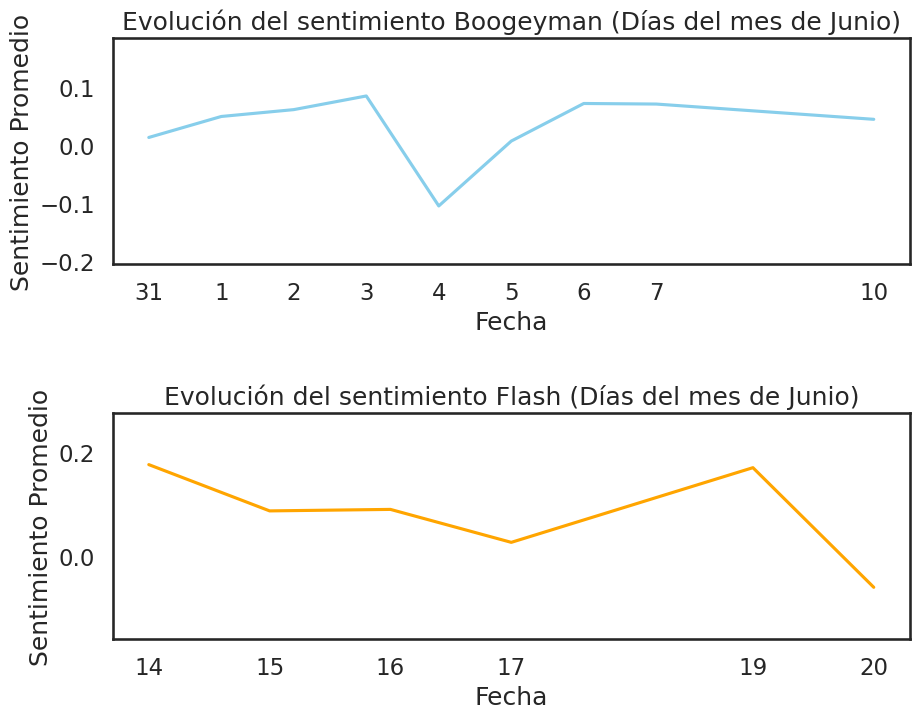

In [139]:
# Convert the 'Fecha' column to datetime type
fin_data['Fecha'] = pd.to_datetime(fin_data['Fecha'], format='%d-%m-%Y')

sentiment_by_date_boogeyman = fin_data[fin_data['pelicula'] == 'Boogeyman'].groupby(fin_data['Fecha'].dt.date)['Polarity'].mean()
sentiment_by_date_flash = fin_data[fin_data['pelicula'] == 'Flash'].groupby(fin_data['Fecha'].dt.date)['Polarity'].mean()

colors = ['skyblue', 'orange']
plt.figure(figsize=(10, 8))

#Boogeyman
plt.subplot(2, 1, 1)
plt.plot(sentiment_by_date_boogeyman.index, sentiment_by_date_boogeyman.values, color=colors[0])
plt.xlabel('Fecha')
plt.ylabel('Sentimiento Promedio')
plt.title('Evolución del sentimiento Boogeyman (Días del mes de Junio)')


days_boogeyman = [date.day for date in sentiment_by_date_boogeyman.index]
plt.xticks(sentiment_by_date_boogeyman.index, days_boogeyman)
plt.ylim(min(sentiment_by_date_boogeyman.values) - 0.1, max(sentiment_by_date_boogeyman.values) + 0.1)

#Flash
plt.subplot(2, 1, 2)
plt.plot(sentiment_by_date_flash.index, sentiment_by_date_flash.values, color=colors[1])
plt.xlabel('Fecha')
plt.ylabel('Sentimiento Promedio')
plt.title('Evolución del sentimiento Flash (Días del mes de Junio)')


days_flash = [date.day for date in sentiment_by_date_flash.index]
plt.xticks(sentiment_by_date_flash.index, days_flash)
plt.ylim(min(sentiment_by_date_flash.values) - 0.1, max(sentiment_by_date_flash.values) + 0.1)

plt.tight_layout(pad=2)
plt.show()






> Mediante el análisis de polaridad de los comentarios con respecto al tiempo se puede observar sobre la película Boogeyman que durante los primeros días del mes las respuestas en cuanto a comentarios eran mayormente positivos, pero en el día 4 los comentarios negativos fueron mayores y en los siguientes días fue escalando de nuevo a favor de los comentarios positivos.
En cuanto a Flash se puede deducir los altibajos de comentarios tanto positivos como negativos durante el mes de Junio, terminado cayendo a favor de los comentarios negativos.



### Graficos de los Rankings

En los siguientes gráficos de barras se visualizan el promedio de rak¿nkings de peliculas en comparación de una con la otra. De igual manera comparando los máximos y mínimos rankings de ambas películas.

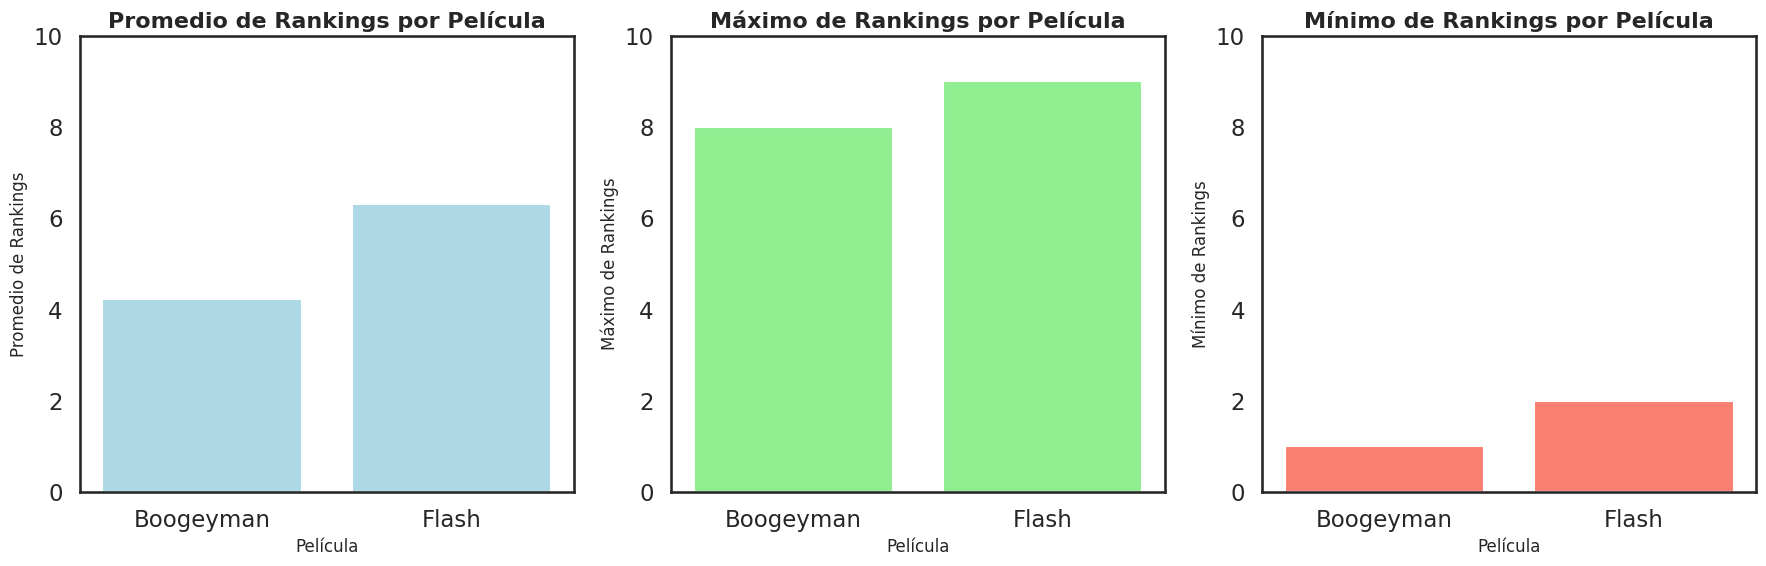

In [140]:
import matplotlib.pyplot as plt
import numpy as np

#Datos
promedio_rankings = pd.Series([4.24, 6.32], index=['Boogeyman', 'Flash'])
max_rankings = pd.Series([8, 9], index=['Boogeyman', 'Flash'])
min_rankings = pd.Series([1, 2], index=['Boogeyman', 'Flash'])
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#promedio de rankings
axes[0].bar(promedio_rankings.index, promedio_rankings.values, color='lightblue')
axes[0].set_title('Promedio de Rankings por Película', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Película', fontsize=12)
axes[0].set_ylabel('Promedio de Rankings', fontsize=12)
axes[0].tick_params(axis='x')
axes[0].set_ylim(0, 10)

#máximo de rankings
axes[1].bar(max_rankings.index, max_rankings.values, color='lightgreen')
axes[1].set_title('Máximo de Rankings por Película', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Película', fontsize=12)
axes[1].set_ylabel('Máximo de Rankings', fontsize=12)
axes[1].tick_params(axis='x')
axes[1].set_ylim(0, 10)

#mínimo de rankings
axes[2].bar(min_rankings.index, min_rankings.values, color='salmon')
axes[2].set_title('Mínimo de Rankings por Película', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Película', fontsize=12)
axes[2].set_ylabel('Mínimo de Rankings', fontsize=12)
axes[2].tick_params(axis='x')
axes[2].set_ylim(0, 10)

plt.tight_layout()

plt.show()




> Sepuede observar que el promedio de rankings de Flash es mayor a Boogeyman y aqui se podría tomar como referencia los resultados del análisis de sentimiento con el método VADER. En cuanto a los rangos de máximos y mínimos rankings por películas no se encuentran grandes diferencias, pero de igual manera Flash cuenta con el ranking máximo (alto) y Booogeyman con el mínimo (bajo).



## Conclusiones

Al realizar el análisis de sentimiento utilizando ambos métodos, se pudo comparar los resultados y tener una mejor visión de cómo los resultados fueron percibidos, con ello se puede concluir lo siguiente:



*   La película "Flash" ha recibido más comentarios postivos y menos negativos en comparación con la película "Boogeyman", lo que indica una tendencia general de sentimientos más positiva hacia "Flash".
*   Se observa una gran diferencia en la percepción de sentimientos entre los métodos Texblob y Vader en cuanto a la película "Boogeyman". Como antes mencionado en los análisis, esto suguiere que los métodos pueden interpretar  de manera diferente los sentimientos expresados en los comentarios de la película, en estos casos de deben de revisar y leer los comentarios para definir cual método se acerca más a los resultados, por ello se realizó la lectura y el método que más se acercaban a los resultados fue el método Vader.


*   En cuanto a la película "Flash" ambos métodos percibieron resultados similares con respecto a los comentarios positivos, a diferencia de Vader que si percibio comentarios neutrales en comparación a Textblob.
*   Referente a los rankings el resultado demuestra que el promedio de rankings de "Flash" es mayor que el de "Boogeyman". Esto respalda los resultados del análisis de sentimiento con el método Vader, donde "Flash" recibió más comentarios positivos en general.


Con respecto a la diferencia de sentimiento por géneros de películas pero se podría deducir que si existen diferencias, como la película "Boogeyman" es de un género de terror y suspenso está orientado a generar sustos, y angustia al expectador, la misma no cumplió con las expectitivas altas del público objetivo de este tipo de género. Tambien es conocido que realizar peliculas de terror que cumpla con todas las expectativas del público es difícil. Y con respecto a "Flash" que cuenta con un público muy diferente a la película "Boogeyman", tambien como forma parte de DC Comics, Flash es un personaje popular en el universo de los comics y tiene una base de fans dedicada, tambien se trata de una película de super héroes lo que genera mucha anticipación entre los fanáticos del género, y fue ampliamnete promocionada lo que generó altas expectativas en el público.





